# Reporte 4: 

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

## Parte 1: Código

Trabajo conjunto con María Fernanda Carrillo 

## A partir del siguiente sistema de ecuaciones que representan el modelo IS-LM

### Ecuaciones de Ingreso (Ye) y la tasa de interés (re) de equilibrio

La ecuación de la Curva IS es: 

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1-(b-m(1-t)}{h}(Y)$$

De manera más simplifica sería:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}(Y)$$

La ecuaación de la Curva LM es:

$$ r = - \frac{1}{j}\frac{M^s_0}{P_0} + \frac{k}{j}Y $$ 

Al igualar ambas Curvas logramos obtener el nivel de ingresos en equilibrio (Ye) y la tasa de interés de equilibrio (re). Se crea así el modelo IS-LM:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}(Y)= - \frac{1}{j}\frac{M^s_0}{Pj} + \frac{k}{j}Y $$

- Ingreso de equilibrio: 

$$ Y^e = \frac{jB_0}{kh + jB_1} + (\frac{h}{kh + jB_1})\frac{Ms_0}{P_0} $$

- Tasa de interés de equilibrio:

$$ r^e = \frac{kB_0}{kh + jB_1} + (\frac{B_1}{kh + jB_1})\frac{Ms_0}{P_0} $$

### Grafico del equilibrio simultáneo en los mercados de bienes y de dinero

Cambiar colores 

In [2]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

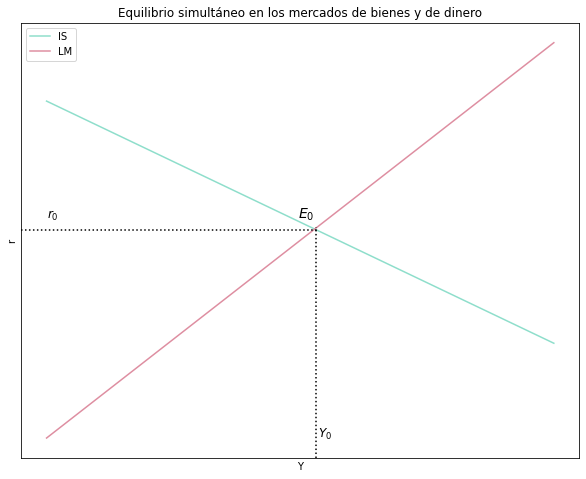

In [3]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "#8edecb") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "#de8ea1")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=52.5,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=94, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')


# Título, ejes y leyenda
ax.set(title="Equilibrio simultáneo en los mercados de bienes y de dinero", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

## Estática Comparativa

### Efectos sobre Y y r en una disminución del gasto fiscal    ( ∆Go < 0)

### Intuición: 

#### Mercado de bienes (IS):

$$ Go↓ → DA↓ → DA < Y → Y↓ $$

#### Mercado de dinero (Lm): 

$$ Y↓ → Md↓ → Md < Ms → r↓ $$

### Matemáticamente: 

In [4]:
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (j*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (k*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [5]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [6]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


In [7]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


 - Cambios en el ingreso de equilibrio:
 $$ ∆Y^e = \frac{j}{hk + jB_1} ∆G_0 $$
 
 $$ ∆Y^e = (+)(-) = (-) < 0 $$


- Cambios en la tasa de interés de equilibrio:

$$ ∆r^e = \frac{k}{h*k + jB_1} ∆G_0 $$

$$ ∆r^e = (+)(-) = (-) < 0 $$

### Gráficos:

In [8]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 84
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [9]:
#--------------------------------------------------
    # NUEVA curva IS: reducción del Gasto Monetario (Go)
    
# Definir SOLO el parámetro cambiado
Go = 54

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

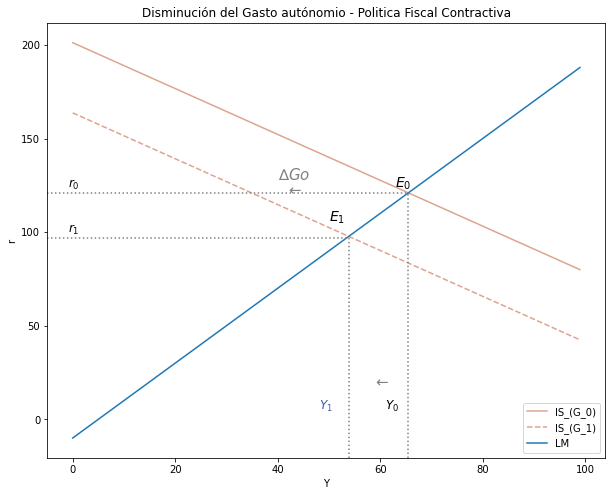

In [10]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "#dea38e") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "#dea38e", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=54,  ymin= 0, ymax= 0.51, linestyle = ":", color = "grey")
plt.axhline(y=97, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")

plt.axvline(x=65.5,  ymin= 0, ymax= 0.61, linestyle = ":", color = "grey")
plt.axhline(y=121, xmin= 0, xmax= 0.65, linestyle = ":", color = "grey")
plt.text(63,124, '$E_0$', fontsize = 14, color = 'black')

plt.text(50,106, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(-1,124, '$r_0$', fontsize = 12, color = 'black')
plt.text(61,5, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(48,5, '$Y_1$', fontsize = 12, color = '#3D59AB')

plt.text(40, 128, '$∆Go$', fontsize=15, color='grey')
plt.text(42, 120, '←', fontsize=15, color='grey')
plt.text(59, 17, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Disminución del Gasto autónomio - Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Efectos sobre Y y r en una disminución de la masa monetaria (Ms < 0)

### Intuición:

#### Mercado de Bienes:

$$ r↑ → I↓ → DA < Y → Y↓ $$

#### Mercado de Dinero

$$ M_s↓ → M^o↓ → M^o < M^d → r↑ $$

### Matemáticamente: Revisar 

In [11]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [12]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [13]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


- Cambios en el ingreso de equilibrio:

$$ ∆Y^e = \frac{h}{hk + jB_1} \frac{1}{P}  ∆M^s_o < 0 $$

$$ ∆Y^e = (+)(+)(-) = (-) < 0 $$

- Cambios en la tasa de interés de equilibrio:

$$ ∆r^e = \frac{B_1}{hk + jB_1} \frac{1}{P} ∆M^s_o $$

$$ ∆r^e = (-)(+)(+)(-) = (+) > 0 $$

### Gráfico:

In [14]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 700             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [15]:
# Definir SOLO el parámetro cambiado
Ms = 200

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

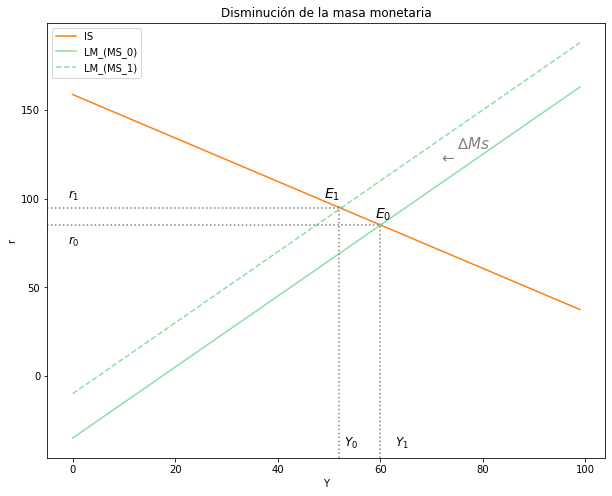

In [16]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "#8edea3")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "#8edea3", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=52,  ymin= 0, ymax= 0.58, linestyle = ":", color = "grey")
plt.axhline(y=95, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=60,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(59,89, '$E_0$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(49,100, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
plt.text(-1,74, '$r_0$', fontsize = 12, color = 'black')
plt.text(63,-40, '$Y_1$', fontsize = 12, color = 'black')
plt.text(75, 128, '$∆Ms$', fontsize=15, color='grey')
plt.text(72, 120, '←', fontsize=15, color='grey')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Efectos sobre Y y r en un incremento de la tasa de impuestos (t > 0)

### Intuición:

#### Mercado de Bienes:

$$ t↑ → DA↓ → DA < Y → Y↓$$

#### Mercado de Dinero:

$$ Y↓ → Md↓ → Md < Ms → r↓ $$

### Matemáticamente: REVISAR!

In [17]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [18]:
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del producto con respecto al diferencial de la tasa impositiva = ", df_Y_eq_t)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial de la tasa impositiva =  -Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


In [19]:
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interes con respecto al diferencial a la tasa impositiva= ", df_r_eq_t)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial a la tasa impositiva=  Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


 - Cambios en el ingreso de equilibrio:

$$ \frac{∆Y^e}{∆t} = (-) $$

$$ \frac{∆Y^e}{(+)} = (-) $$

$$ ∆Y^e = (-) < 0 $$

$$ ∆Y = \frac{+}{-} + \frac{+}{-} = (-) $$

- Cambios en la tasa de interés de equilibrio:
$$ \frac{∆r^e}{∆t} = (-) $$

$$ \frac{∆r^e}{(+)} = (-) $$

$$ ∆r^e = (-) < 0 $$

$$ ∆r^e = \frac{+}{-} + \frac{+}{-} = (-) $$

### Gráfico: 

In [20]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [21]:
# Nueva curva IS: aumento de la tasa impositiva (t)

# Definir SOLO el parámetro cambiado
t = 0.9

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

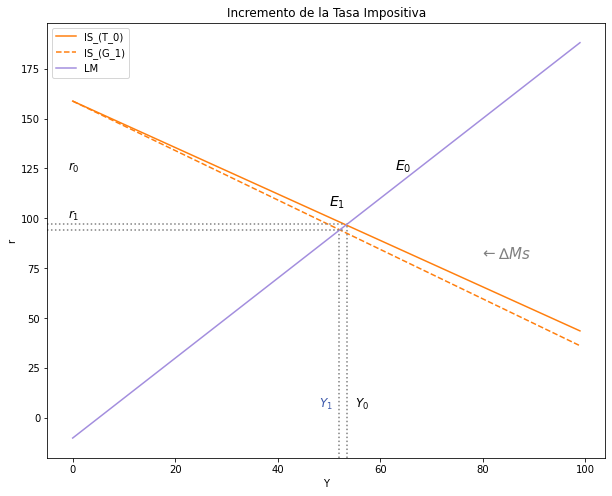

In [22]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(T_0)", color = "C1") #IS_orginal
ax.plot(Y, r_t, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "#a38ede")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=52,  ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=94, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")

plt.axvline(x=53.6,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=97, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")
plt.text(63,124, '$E_0$', fontsize = 14, color = 'black')

plt.text(50,106, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(-1,124, '$r_0$', fontsize = 12, color = 'black')
plt.text(55,5, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(48,5, '$Y_1$', fontsize = 12, color = '#3D59AB')


plt.text(83, 80, '$∆Ms$', fontsize=15, color='grey')
plt.text(80, 80, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Incremento de la Tasa Impositiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

## A partir del modelo IS - LM [puntos extras]: 

### Encuentre ecuaciones de Ingreso (Ye) y la tasa de interés (re) de equilibrio

- Nueva Curva IS: 

A partir de la nueva identidad Ingreso-Gasto: $ Y = C + I + G $

$$ Y = C_0 + bY^d + I_0 - hr + G_0$$

$$ Y = C_0 + I_0 + G_0 - hr + b(1-t)Y $$

$$ hr = C_0 + I_0 + G_0 + b(1-t)Y - Y $$

$$ hr = C_0 + I_0 + G_0 - Y(1- b(1-t)) $$

La ecuación de la curva IS es:

$$ r = \frac{C_0 + I_0 + G_0}{h} - \frac{1- b(1-t)}{h}Y $$

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $B_0 = C_0 + I_0 + G_0 $ y $ B_1 = 1- b(1-t) $


- Nueva Curva LM:


$$ \frac{M^s_0}{P_0} = kY - j(r + π^e) $$

$$ j(r + π^e) = kY - \frac{M^s_0}{P_0} $$

$$ r + π^e = - \frac{M^s_0}{jP_0} + \frac{kY}{j} $$

La ecuación de la curva LM es:

$$ r = - \frac{M^s_0}{jP_0} + \frac{k}{j}Y - π^e $$

- Equilibrio modelo IS-LM:

Para hallar $Y^e$:

$$ \frac{B_0}{h} - \frac{B_1}{h}Y = - \frac{M^s_0}{jP_0} + \frac{k}{j}Y - π^e $$

$$ \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e = \frac{k}{j}Y + \frac{B_1}{h}Y $$

$$ Y(\frac{k}{j} + \frac{B_1}{h}) = \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e $$

$$ Y(\frac{hk + jB_1}{jh}) = \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e $$

$$ Y^e = \frac{jB_0}{kh + jB_1} + \frac{M_0^s}{P_0} \frac{h}{kh + jB_1} + \frac{jh}{kh + jB_1} π^e $$

Para hallar $r^e$:

$$ r^e = - \frac{Ms_o}{P_o} (\frac{B_1}{kh + jB_1}) + \frac{kB_o}{kh + jB_1} - \frac{B_1}{kh + jB_1} π^e $$

### Grafico del equilibrio simultáneo en los mercados de bienes y de dinero

In [23]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 4

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)

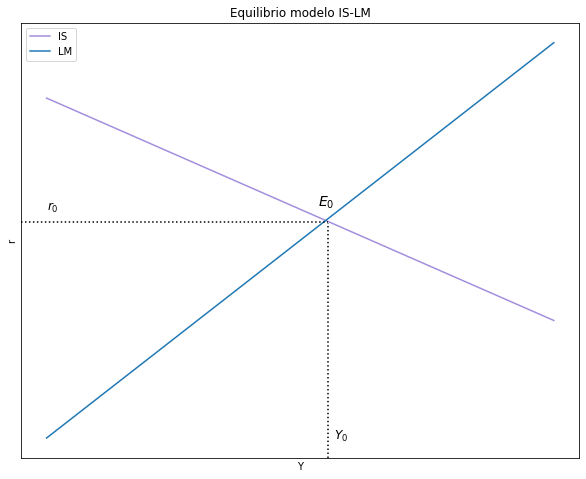

In [24]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "#a38ede") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.54, linestyle = ":", color = "black")
plt.axhline(y=94, xmin= 0, xmax= 0.55, linestyle = ":", color = "black")
plt.text(53,102, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-15, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Equilibrio modelo IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [25]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))

## Estática Comparativa

### Efectos sobre Y y r en una disminución de los Precios (Po < 0)

### Intuición:

- Mercado de bienes: 

$$ P_0↓ → M^s↓ → M^s > M^d → r↓ $$

- Mercado de dinero: 

$$ r↓ → I↑ → DA↑ → DA > Y → Y↑ $$

### Matemáticamente:

In [26]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))


In [27]:
df_Y_eq_P = diff(Y_eq, P)
print("El Diferencial del Producto con respecto al diferencial del nivel de precios = ", df_Y_eq_P)

El Diferencial del Producto con respecto al diferencial del nivel de precios =  -Ms*h/(P**2*(h*k + j*(-b*(1 - t) + 1)))


¿$∆Y$ sabiendo que $∆P < 0$?

$$ \frac{∆Y}{∆P} = (-) $$

$$ \frac{∆Y}{(-)} = (-) $$

$$ ∆Y > 0 $$

In [28]:
df_r_eq_P = diff(r_eq, P)
print("El Diferencial de la tasa de interés con respecto al diferencial del nivel de precios = ", df_r_eq_P)

El Diferencial de la tasa de interés con respecto al diferencial del nivel de precios =  Ms*(-b*(1 - t) + 1)/(P**2*(h*k + j*(-b*(1 - t) + 1)))


¿$∆r$ sabiendo que $∆P < 0$?

$$ \frac{∆r}{∆P} = (+) $$

$$ \frac{∆r}{(-)} = (+) $$

$$ ∆r < 0 $$

### Gráfico:

In [29]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 4

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)


#--------------------------------------------------
    # Nueva curva LM 
    
P = 5

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2_P = i_LM_2( k, j, Ms, P, Y, π)

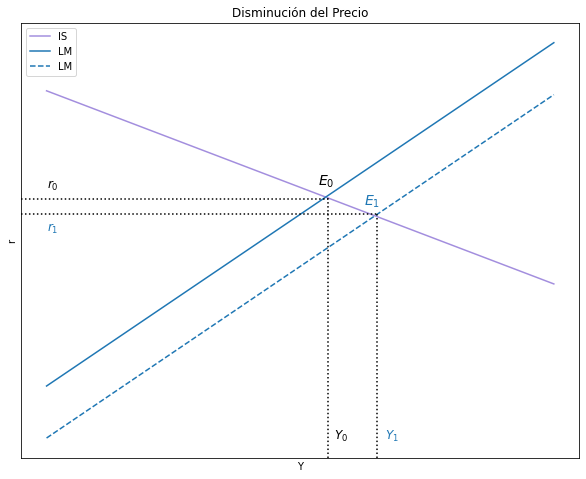

In [30]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "#a38ede") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM
ax.plot(Y, i_2_P, label="LM", color = "C0", linestyle ='dashed')  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.6, linestyle = ":", color = "black")
plt.axhline(y=94, xmin= 0, xmax= 0.55, linestyle = ":", color = "black")
plt.text(53,102, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-45, '$Y_0$', fontsize = 12, color = 'black')

plt.axvline(x=64.5,  ymin= 0, ymax= 0.56, linestyle = ":", color = "black")
plt.axhline(y=85, xmin= 0, xmax= 0.64, linestyle = ":", color = "black")
plt.text(62,90, '$E_1$', fontsize = 14, color = 'C0')
plt.text(0,75, '$r_1$', fontsize = 12, color = 'C0')
plt.text(66,-45, '$Y_1$', fontsize = 12, color = 'C0')

# Título, ejes y leyenda
ax.set(title="Disminución del Precio", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Efectos sobre Y y r en una disminución de la inflación esperada (π < 0)

### Intuición:

$$ π↓ → r↑ $$

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

### Matemáticamente:

In [31]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))

In [32]:
df_Y_eq_π = diff(Y_eq, π)
print("El Diferencial del Producto con respecto al diferencial del nivel de inflación = ", df_Y_eq_π)

El Diferencial del Producto con respecto al diferencial del nivel de inflación =  h*j/(h*k + j*(-b*(1 - t) + 1))


¿$∆Y$ sabiendo que $∆π < 0$?

$$ \frac{∆Y}{∆π} = (+) $$

$$ \frac{∆Y}{(-)} = (+) $$

$$ ∆Y < 0 $$

In [33]:
df_r_eq_π = diff(r_eq, π)
print("El Diferencial de la tasa de interés con respecto al diferencial del nivel de inflación = ", df_r_eq_π)

El Diferencial de la tasa de interés con respecto al diferencial del nivel de inflación =  -h*(-b*(1 - t) + 1)/k


¿$∆r$ sabiendo que $∆π < 0$?

$$ \frac{∆r}{∆π} = (-) $$

$$ \frac{∆r}{(-)} = (-) $$

$$ ∆r > 0 $$

### Gráfico:

In [34]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 20

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)


#--------------------------------------------------
    # Nueva curva LM 
    
π = 2

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2_π = i_LM_2( k, j, Ms, P, Y, π)

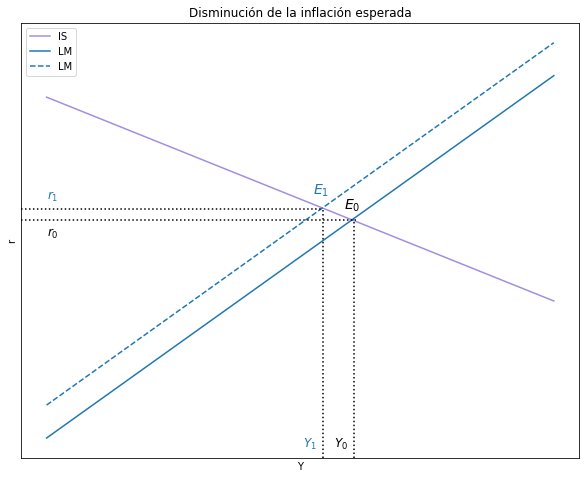

In [35]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "#a38ede") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM
ax.plot(Y, i_2_π, label="LM", color = "C0", linestyle ='dashed')  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=54,  ymin= 0, ymax= 0.57, linestyle = ":", color = "black")
plt.axhline(y=95, xmin= 0, xmax= 0.54, linestyle = ":", color = "black")
plt.text(52,103, '$E_1$', fontsize = 14, color = 'C0')
plt.text(0,100, '$r_1$', fontsize = 12, color = 'C0')
plt.text(50,-35, '$Y_1$', fontsize = 12, color = 'C0')

plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "black")
plt.axhline(y=89, xmin= 0, xmax= 0.6, linestyle = ":", color = "black")
plt.text(58,95, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,80, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-35, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Disminución de la inflación esperada", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

## Parte 2: Reporte

La pregunta de investigación de este artículo es la siguiente: ¿Pueden todavía los viejos métodos y modelos macroeconómicos como el modelo IS-LM explicar los problemas macroeconómicos contemporáneos mediante políticas monetarias no convencionales? En este caso, se aplica esta pregunta sobre las secuelas de la crisis económica del 2008 y las políticas aplicadas por la Reserva Federal de los Estados Unidos para contrarrestarlas: una tasa de interés casi nula ‘el tiempo que sea necesario’ y la intervención (mediante la compra) en el mercado de bonos de largo plazo. Así se buscó que la oferta y la demanda se ajustaran con tipos de intereses más bajos y así reestabilizar la confianza financiera.

Una fortaleza de este enfoque es el poder analizar los efectos de políticas fiscales y los choques adversos de oferta. Asimismo, una fortaleza es como logran presentan un modelo más dinámico, es decir, en el cual se puede conocer la trayectoria de las variables endógenas en el cambio entre el equilibrio de corto plazo y el equilibrio final. Aunque igual es un modelo básico, el agregar la variable de tiempo es importante para poder ver su estabilidad y si ocurrirán fluctuaciones. Sin embargo, una debilidad suya es no considerar el factor de la ‘trampa de liquidez’ con mayor profundidad y como esta se relaciona con la capacidad de los bancos de aumentar o reducir el dinero, así como las expectativas de las mismas personas y su rol frente a tasas tan bajas. Por esta razón, sería interesante también darle un enfoque a la política fiscal frente a ciertas limitaciones que puede tener las políticas monetarias frente a la amenaza de la liquidez y/otros factores externos. 

La contribución de este artículo es definitivamente su enfoque más keynesiano que nos permite utilizar instrumentos no convencionales como una mayor atención a los mercados de deuda a largo plazo. Asimismo, el uso del modelo IS-LM +BB con un giro en el cuál analiza las políticas del Fed cambiando la variable endógena de oferta de dinero a tasa de interés de corto plazo, así como incluir el elemento de mercado de bonos de largo plazo, en lugar de solo uno a corto plazo, afectando así la demanda agregada. Todo esto en términos mucho más sencillo que si fuera analizado mediante modelos macroeconómicos contemporáneos. Asimismo, considero que este análisis de la política monetaria no convencional y como se utilizó para combatir la postcrisis 2008 nos permite también hablar sobre los límites de las políticas convencionales para evitar un riesgo de estanflación y estimular la actividad económica ante el desempleo, de esta manera cuestionando las políticas monetarias convencionales en base del control de tasa de interés de corto plazo y la intervención el mercado de bonos de corto plazo. 

Sería interesante ver si este modelo keynesiano y el uso de políticas no convencionales también se podría aplicar a la época postpandemia en la cuál la economía fue fuertemente impactada. A pesar de que ahora no estamos frente a una crisis financiera, sino que han sufrido un shock el funcionamiento de las empresas y la estabilidad de los empleos. Aun así, la demanda y oferta han sufrido en gran magnitud. Centrándonos en la región latinoamericana, el Banco de Desarrollo de América Latina señala que podríamos seguir los pasos de la Reserva Federal o del Banco de Inglaterra que ya han comenzado a aplicar política no convencionales, pero para que se puedan aplicar de manera efectiva en toda Latinoamérica se necesitan de ciertas condiciones básicas como: tasas de interés bajas, expectativas de inflación fijas o mercados de renta fija profundos, así como un marco institucional que le de mayor liberta de movimiento a las acciones del banco central (2020). De esta manera, se logra entender que hay otros factores externos que juegan un rol fundamental a la hora de aplicar políticas monetarias no convencionales. 

- BIBLIOGRAFÍA

Banco de Desarrollo de América Latina. (2020, 18 mayo). ¿Hay espacio para medidas de política monetaria no convencionales en América Latina? CAF. Recuperado 25 de septiembre de 2022, de https://www.caf.com/es/conocimiento/visiones/2020/05/hay-espacio-medidas-de-politica-monetaria-no-convencionales-en-america-latina//.
